# Author : Sneh Agarwal

### Task 2 #1 : Prediction using Supervised Machine Learning

#### Problem Statement : Predict the percentage of a student based on the number of study hours.

##### Step 1 : Importing all libraries required in this notebook

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

###### Step 2 : Reading data

In [4]:
url = "http://bit.ly/w-data"
sample_data = pd.read_csv(url)
print('Data Imported successfully')
print('Sample Data:')
sample_data.head(10)

Data Imported successfully
Sample Data:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


###### Step 3: Data Info

In [5]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###### Step 4:Statistical feature of the data

In [6]:
sample_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###### Step 5: Plotting the distribution of scores

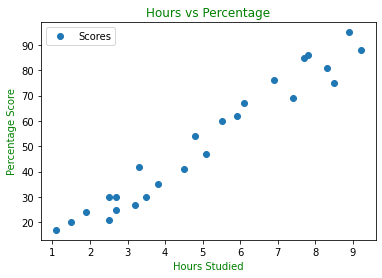

In [7]:
sample_data.plot(x='Hours', y='Scores', style = 'o')
plt.title('Hours vs Percentage',color='green')
plt.xlabel('Hours Studied',color='green')
plt.ylabel('Percentage Score',color='green')
plt.show()

###### Step 6:Preparing the data

In [8]:
X = sample_data.iloc[:, :-1].values  
Y = sample_data.iloc[:, 1].values  

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

###### Step 7:Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


###### Step 8:Plotting the regression line

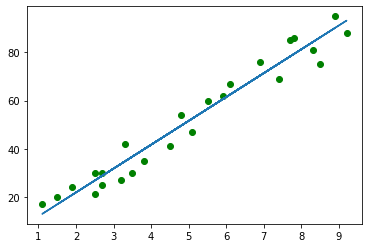

In [11]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, Y,color='green')
plt.plot(X, line);
plt.show()

###### Step 9:Making Predictions

In [12]:
# Testing data - In Hours
print(X_test) 
# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
#Predicting the Score of a student if he/she studies for 9.25 Hours
prediction = regressor.predict([[9.25]])
print('Number of hours: 9.25')
print('Predicted Score: {}'.format(prediction[0]))

Number of hours: 9.25
Predicted Score: 93.69173248737538


###### Step 10: Evaluating the Model

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.183859899002975
